# 1. Informações: cidades do estudo e variáveis climáticas

* Estações do INMET: dados de 01/01/2008 à 31/12/2022 (15 anos) 

    1- Paraná - TO (A010); 

    2- Imperatriz - MA (A225);

    3- Bom Jesus do Piauí - PI (A326);

    4- Luíz Eduardo Magalhães - BA (A404);

    5- Casa Branca - SP (A738).

* Variáveis climáticas:
    
    1- Tmax (ºC);

    2- Tmin (ºC);

    3- URmax (%);

    4- URmin (%);

    5- vento (velocidade do vento em metros por segundo (m/s));
    
    6- Rad (Kilojoules por hora (kJ/h)).

# 2. Análise estatística: dados brutos

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import seaborn as sns
from datetime import date, datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregar as funções:

%run "./plot_graphic.ipynb"
#%run "./DP_find_extreme_values.ipynb"
%run "./IQR_find_extreme_values.ipynb"

In [3]:
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)

In [4]:
# Selecionar a cidade:

df=pd.read_csv('./Dados_Estacoes/A010.csv', sep = ';') # Paraná - TO (A010)
# df=pd.read_csv('./Dados_Estacoes/A225.csv', sep = ';') # Imperatriz - MA (A225)
# df=pd.read_csv('./Dados_Estacoes/A326.csv', sep = ';') # Bom Jesus do Piauí - PI (A326)
# df=pd.read_csv('./Dados_Estacoes/A404.csv', sep = ';') # Luíz Eduardo Magalhães - BA (A404)
# df=pd.read_csv('./Dados_Estacoes/A738.csv', sep = ';') # Casa Branca - SP (A738)

print("Linhas x Colunas: ", df.shape) # linhas x colunas
print("\nTipo de dado: ", type(df)) # tipo de dado
print("\nNome das colunas: ", df.columns) # nome das colunas
print("\nInformações: ")
df.info()

Linhas x Colunas:  (131496, 9)

Tipo de dado:  <class 'pandas.core.frame.DataFrame'>

Nome das colunas:  Index(['Data', 'Hora', 'Prec', 'Rad', 'Tmax', 'Tmin', 'Urmax', 'Urmin',
       'vento'],
      dtype='object')

Informações: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131496 entries, 0 to 131495
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Data    131496 non-null  object 
 1   Hora    131496 non-null  int64  
 2   Prec    109745 non-null  float64
 3   Rad     118685 non-null  float64
 4   Tmax    118783 non-null  float64
 5   Tmin    118784 non-null  float64
 6   Urmax   118784 non-null  float64
 7   Urmin   118749 non-null  float64
 8   vento   118829 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.0+ MB


In [5]:
print(df.head(3)) # primeiras linhas
print("\n")
print(df.tail(3)) # últimas linhas
# df_A010 # todo o dataframe
df[['Prec','Rad','Tmax','Tmin','Urmax','Urmin','vento']].describe()

         Data  Hora  Prec      Rad  Tmax  Tmin  Urmax  Urmin  vento
0  2008-01-01     0  0.00    -3.54 27.00 26.10  79.00  74.00   1.80
1  2008-01-01   100  0.00 -3539.00 26.40 25.50  82.00  78.00   1.60
2  2008-01-01   200  0.00    -3.54 25.70 25.30  82.00  82.00   1.40


              Data  Hora  Prec       Rad  Tmax  Tmin  Urmax  Urmin  vento
131493  2022-12-31  2100   NaN 935658.00 30.60 29.10  59.00  54.00   1.60
131494  2022-12-31  2200   NaN 101518.00 29.10 27.20  67.00  58.00   1.30
131495  2022-12-31  2300   NaN       NaN   NaN   NaN    NaN    NaN    NaN


,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento
count,109745.00,118685.00,118783.00,118784.00,118784.00,118749.00,118829.00
mean,0.12,735202.98,26.85,25.31,67.11,60.62,1.01
std,1.23,1085178.84,5.24,4.90,22.61,23.57,1.14
min,0.00,-7079.00,12.40,10.90,9.00,8.00,0.00
25%,0.00,-3.60,22.90,22.10,51.00,41.00,0.00
50%,0.00,1884.47,26.00,24.40,74.00,64.00,0.60
75%,0.00,1443748.00,31.20,29.00,87.00,83.00,1.70
max,56.80,4826139.00,42.00,40.00,96.00,96.00,10.10


# 3. Análise estatística: dados pré-processados

In [6]:
# Inserir novas colunas:
df.insert(9, 'PREC', '', allow_duplicates=False)
df.insert(10, 'RAD', '', allow_duplicates=False)
df.insert(11, 'TMAX', '', allow_duplicates=False)
df.insert(12, 'TMIN', '', allow_duplicates=False)
df.insert(13, 'URMAX', '', allow_duplicates=False)
df.insert(14, 'URMIN', '', allow_duplicates=False)
df.insert(15, 'U', '', allow_duplicates=False)

df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,0.00,-3.54,27.00,26.10,79.00,74.00,1.80,,,,,,,
1,2008-01-01,100,0.00,-3539.00,26.40,25.50,82.00,78.00,1.60,,,,,,,
2,2008-01-01,200,0.00,-3.54,25.70,25.30,82.00,82.00,1.40,,,,,,,
3,2008-01-01,300,0.00,-3.54,25.40,25.20,83.00,82.00,1.30,,,,,,,
4,2008-01-01,400,0.00,-3.54,25.30,24.80,84.00,82.00,0.60,,,,,,,
5,2008-01-01,500,0.00,-3538.00,25.10,24.50,85.00,81.00,2.10,,,,,,,
6,2008-01-01,600,0.00,-3.54,24.50,23.90,89.00,85.00,2.10,,,,,,,
7,2008-01-01,700,0.00,-3494.00,23.90,23.70,90.00,89.00,2.00,,,,,,,
8,2008-01-01,800,0.00,-3368.00,23.80,23.50,91.00,90.00,0.90,,,,,,,
9,2008-01-01,900,0.00,3079.00,23.90,23.70,90.00,88.00,1.60,,,,,,,


In [7]:
# 1º) Radiação negativa será igual a NaN:
df['Rad'].where(~(df['Rad'] < 0), other=math.nan, inplace=True)
df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,0.00,NaN,27.00,26.10,79.00,74.00,1.80,,,,,,,
1,2008-01-01,100,0.00,NaN,26.40,25.50,82.00,78.00,1.60,,,,,,,
2,2008-01-01,200,0.00,NaN,25.70,25.30,82.00,82.00,1.40,,,,,,,
3,2008-01-01,300,0.00,NaN,25.40,25.20,83.00,82.00,1.30,,,,,,,
4,2008-01-01,400,0.00,NaN,25.30,24.80,84.00,82.00,0.60,,,,,,,
5,2008-01-01,500,0.00,NaN,25.10,24.50,85.00,81.00,2.10,,,,,,,
6,2008-01-01,600,0.00,NaN,24.50,23.90,89.00,85.00,2.10,,,,,,,
7,2008-01-01,700,0.00,NaN,23.90,23.70,90.00,89.00,2.00,,,,,,,
8,2008-01-01,800,0.00,NaN,23.80,23.50,91.00,90.00,0.90,,,,,,,
9,2008-01-01,900,0.00,3079.00,23.90,23.70,90.00,88.00,1.60,,,,,,,


In [8]:
# Soma: PREC e RAD:
df.loc[0:23, "PREC"] = np.nansum(df.loc[0:23,"Prec"])

# 2º) Correção da radiação: kJ m-2 dia-1 para MJ m-2 dia-1
df.loc[0:23,  "RAD"] = (np.nanmean(df.loc[0:23,"Rad"]))/1000

# Média: TMAX e TMIN:
df.loc[0:23, "TMAX"] = np.nanmean(df.loc[0:23,"Tmax"])
df.loc[0:23, "TMIN"] = np.nanmean(df.loc[0:23,"Tmin"])

# Média: URMAX e URMIN:
df.loc[0:23,"URMAX"] = np.nanmean(df.loc[0:23,"Urmax"])
df.loc[0:23,"URMIN"] = np.nanmean(df.loc[0:23,"Urmin"])

# Média: U (vento):
df.loc[0:23,"U"] = np.nanmean(df.loc[0:23,"vento"])

df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,0.00,NaN,27.00,26.10,79.00,74.00,1.80,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
1,2008-01-01,100,0.00,NaN,26.40,25.50,82.00,78.00,1.60,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
2,2008-01-01,200,0.00,NaN,25.70,25.30,82.00,82.00,1.40,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
3,2008-01-01,300,0.00,NaN,25.40,25.20,83.00,82.00,1.30,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
4,2008-01-01,400,0.00,NaN,25.30,24.80,84.00,82.00,0.60,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
5,2008-01-01,500,0.00,NaN,25.10,24.50,85.00,81.00,2.10,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
6,2008-01-01,600,0.00,NaN,24.50,23.90,89.00,85.00,2.10,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
7,2008-01-01,700,0.00,NaN,23.90,23.70,90.00,89.00,2.00,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
8,2008-01-01,800,0.00,NaN,23.80,23.50,91.00,90.00,0.90,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
9,2008-01-01,900,0.00,3079.00,23.90,23.70,90.00,88.00,1.60,0.00,1510.37,27.77,26.65,75.92,70.04,1.62


In [9]:
start = 24
finish = 47

for row in df.itertuples():
    df.loc[start:finish,"PREC"] = np.nansum(df.loc[start:finish,"Prec"])
    # 2º) Correção da radiação: kJ m-2 dia-1 para MJ m-2 dia-1
    df.loc[start:finish,"RAD"] = (np.nanmean(df.loc[start:finish,"Rad"]))/1000
    df.loc[start:finish,"TMAX"] = np.nanmean(df.loc[start:finish,"Tmax"])
    df.loc[start:finish,"TMIN"] = np.nanmean(df.loc[start:finish,"Tmin"])
    df.loc[start:finish,"URMAX"] = np.nanmean(df.loc[start:finish,"Urmax"])
    df.loc[start:finish,"URMIN"] = np.nanmean(df.loc[start:finish,"Urmin"])
    df.loc[start:finish,"U"] = np.nanmean(df.loc[start:finish,"vento"])
    
    start += 24
    finish += 24

df.head(25)

,Data,Hora,Prec,Rad,Tmax,Tmin,Urmax,Urmin,vento,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0,0.00,NaN,27.00,26.10,79.00,74.00,1.80,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
1,2008-01-01,100,0.00,NaN,26.40,25.50,82.00,78.00,1.60,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
2,2008-01-01,200,0.00,NaN,25.70,25.30,82.00,82.00,1.40,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
3,2008-01-01,300,0.00,NaN,25.40,25.20,83.00,82.00,1.30,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
4,2008-01-01,400,0.00,NaN,25.30,24.80,84.00,82.00,0.60,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
5,2008-01-01,500,0.00,NaN,25.10,24.50,85.00,81.00,2.10,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
6,2008-01-01,600,0.00,NaN,24.50,23.90,89.00,85.00,2.10,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
7,2008-01-01,700,0.00,NaN,23.90,23.70,90.00,89.00,2.00,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
8,2008-01-01,800,0.00,NaN,23.80,23.50,91.00,90.00,0.90,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
9,2008-01-01,900,0.00,3079.00,23.90,23.70,90.00,88.00,1.60,0.00,1510.37,27.77,26.65,75.92,70.04,1.62


In [10]:
# Criar novo dataframe com cópia do df anterior:
new_df = df[['Data','PREC','RAD','TMAX','TMIN','URMAX','URMIN','U']].copy()
pd.DataFrame(new_df)
# new_df.head(25)
# print("Linhas x Colunas: ", new_df.shape)
new_df

,Data,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
1,2008-01-01,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
2,2008-01-01,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
3,2008-01-01,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
4,2008-01-01,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
...,...,...,...,...,...,...,...,...
131491,2022-12-31,0.00,1461.63,26.66,25.40,75.40,69.80,0.55
131492,2022-12-31,0.00,1461.63,26.66,25.40,75.40,69.80,0.55
131493,2022-12-31,0.00,1461.63,26.66,25.40,75.40,69.80,0.55
131494,2022-12-31,0.00,1461.63,26.66,25.40,75.40,69.80,0.55


In [11]:
# Eliminar linhas duplicadas:
new_df.drop_duplicates(inplace=True)

# Resetar o índice sem criar uma nova coluna:
new_df = new_df.reset_index(drop=True)
new_df

,Data,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
0,2008-01-01,0.00,1510.37,27.77,26.65,75.92,70.04,1.62
1,2008-01-02,0.20,1205.72,27.12,26.02,73.17,66.87,2.16
2,2008-01-03,0.00,770.20,26.00,24.88,81.58,75.54,1.10
3,2008-01-04,0.40,1914.13,28.48,27.08,71.30,63.87,1.40
4,2008-01-05,0.00,1978.96,29.04,27.33,62.58,53.58,1.00
...,...,...,...,...,...,...,...,...
5474,2022-12-27,0.00,1204.88,25.60,24.43,78.79,73.04,0.21
5475,2022-12-28,0.00,987.38,24.99,24.02,82.91,78.55,0.81
5476,2022-12-29,0.00,1284.71,25.53,24.24,79.91,73.82,0.26
5477,2022-12-30,0.00,1113.83,25.57,24.20,79.61,74.30,0.44


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    5479 non-null   object
 1   PREC    5479 non-null   object
 2   RAD     5126 non-null   object
 3   TMAX    5120 non-null   object
 4   TMIN    5120 non-null   object
 5   URMAX   5120 non-null   object
 6   URMIN   5120 non-null   object
 7   U       5128 non-null   object
dtypes: object(8)
memory usage: 342.6+ KB


In [13]:
# Converter de object para float64:

new_df['PREC'] = new_df['PREC'].astype(float)
new_df['RAD'] = new_df['RAD'].astype(float)

new_df['TMAX'] = new_df['TMAX'].astype(float)
new_df['TMIN'] = new_df['TMIN'].astype(float)

new_df['URMAX'] = new_df['URMAX'].astype(float)
new_df['URMIN'] = new_df['URMIN'].astype(float)

new_df['U'] = new_df['U'].astype(float)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    5479 non-null   object 
 1   PREC    5479 non-null   float64
 2   RAD     5126 non-null   float64
 3   TMAX    5120 non-null   float64
 4   TMIN    5120 non-null   float64
 5   URMAX   5120 non-null   float64
 6   URMIN   5120 non-null   float64
 7   U       5128 non-null   float64
dtypes: float64(7), object(1)
memory usage: 342.6+ KB


In [14]:
# Realizar pesquisa nos dados para saber se será necessário a correção:
# PREC:
print('PREC < 0: ', new_df.query("PREC < 0"))
print('\nPREC > 450: ', new_df.query("PREC > 450"))

# TMAX:
print('\nTMAX <= -30: ', new_df.query("TMAX <= -30"))

# TMIN:
print('\nTMIN > 50: ', new_df.query("TMIN > 50"))

PREC < 0:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

PREC > 450:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

TMAX <= -30:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

TMIN > 50:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []


In [15]:
# URMAX:
print('\nURMAX > 100: ', new_df.query("URMAX > 100"))

# URMIN:
print('\nURMIN < 0: ', new_df.query("URMIN < 0"))

# U:
print('\nU < 0: ', new_df.query("U < 0"))
print('\nU > 100: ', new_df.query("U > 100"))


URMAX > 100:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

URMIN < 0:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

U < 0:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []

U > 100:  Empty DataFrame
Columns: [Data, PREC, RAD, TMAX, TMIN, URMAX, URMIN, U]
Index: []


In [16]:
new_df[['PREC','RAD','TMAX','TMIN','URMAX','URMIN','U']].describe()

,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U
count,5479.00,5126.00,5120.00,5120.00,5120.00,5120.00,5128.00
mean,2.44,1379.02,26.92,25.37,66.84,60.33,1.02
std,8.51,371.92,2.19,2.08,14.52,15.15,0.58
min,0.00,0.31,20.87,18.94,15.00,12.57,0.00
25%,0.00,1181.53,25.35,23.96,57.47,50.00,0.58
50%,0.00,1416.29,26.67,25.22,69.70,62.77,0.99
75%,0.20,1610.77,28.24,26.64,78.41,72.26,1.40
max,146.40,3812.09,39.85,37.45,94.00,94.00,4.23


# 4. Detectar os pontos extremos 

## 4.1. Estatística descritiva: Histogramas x Gráfico Quantil x Boxplot

In [17]:
# Medir o grau de simetria da curva, em relação a distribuição normal:
# Se skew = 0 -> distribuição simétrica;
# Se skew > 0 -> assimétrica positiva (à direita);
# Se skew < 0 -> assimétrica negativa (à esquerda).

print('PREC:', new_df['PREC'].skew())
print('RAD:', new_df['RAD'].skew())
print('TMAX:', new_df['TMAX'].skew())
print('TMIN:', new_df['TMIN'].skew())
print('URMAX:', new_df['URMAX'].skew())
print('URMIN:', new_df['URMIN'].skew())
print('U:', new_df['U'].skew())

PREC: 5.639119942005769
RAD: -0.30246002217409895
TMAX: 0.7113294058005057
TMIN: 0.575569657069309
URMAX: -0.6544742083768689
URMIN: -0.5092659721199303
U: 0.5916503506510201


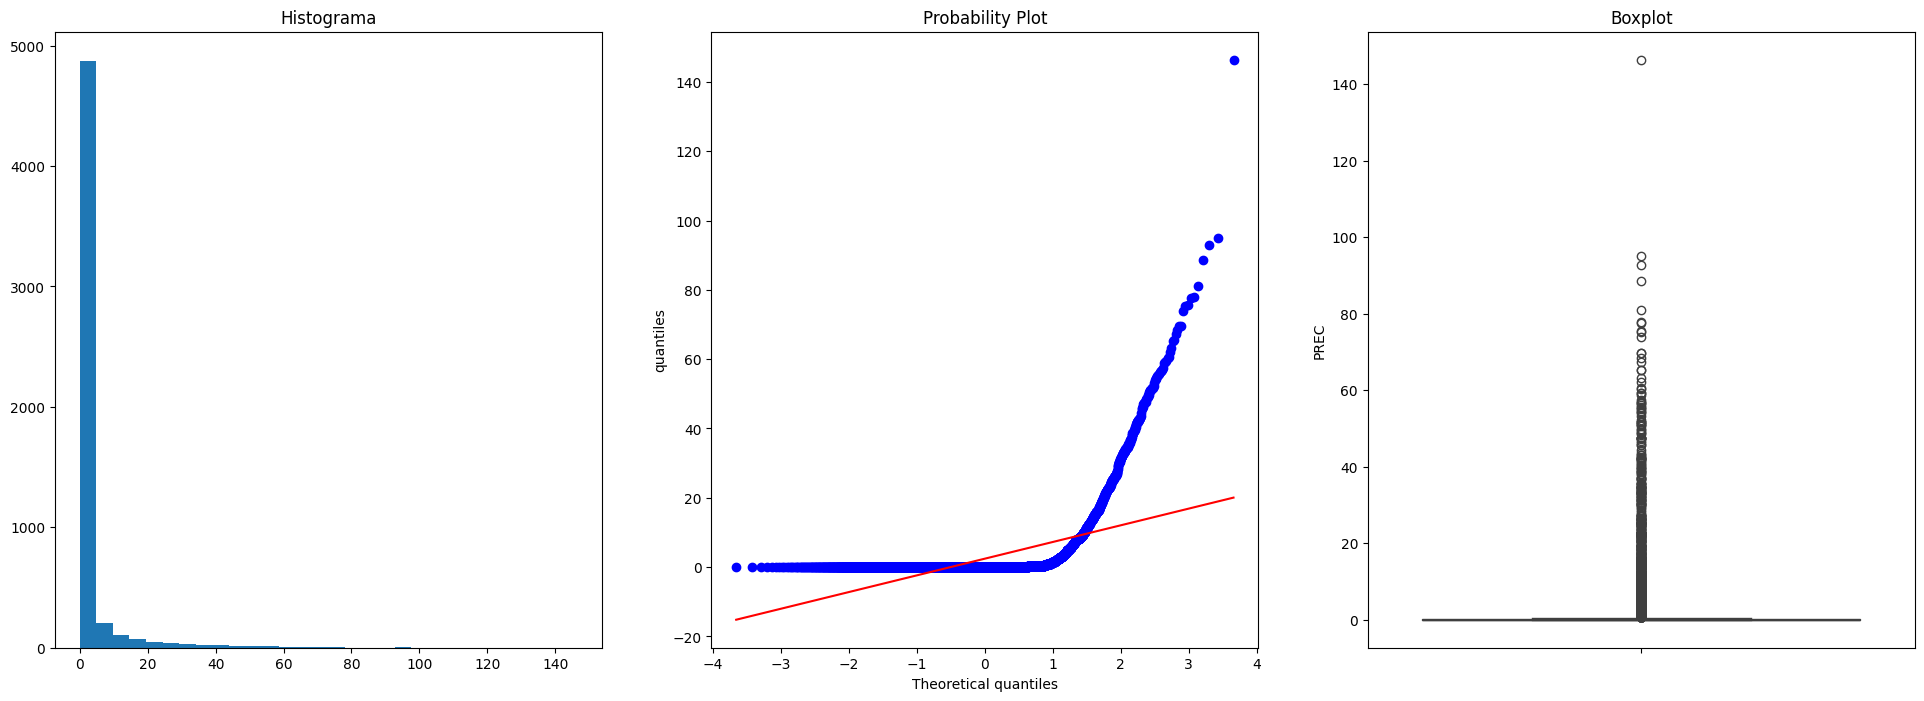

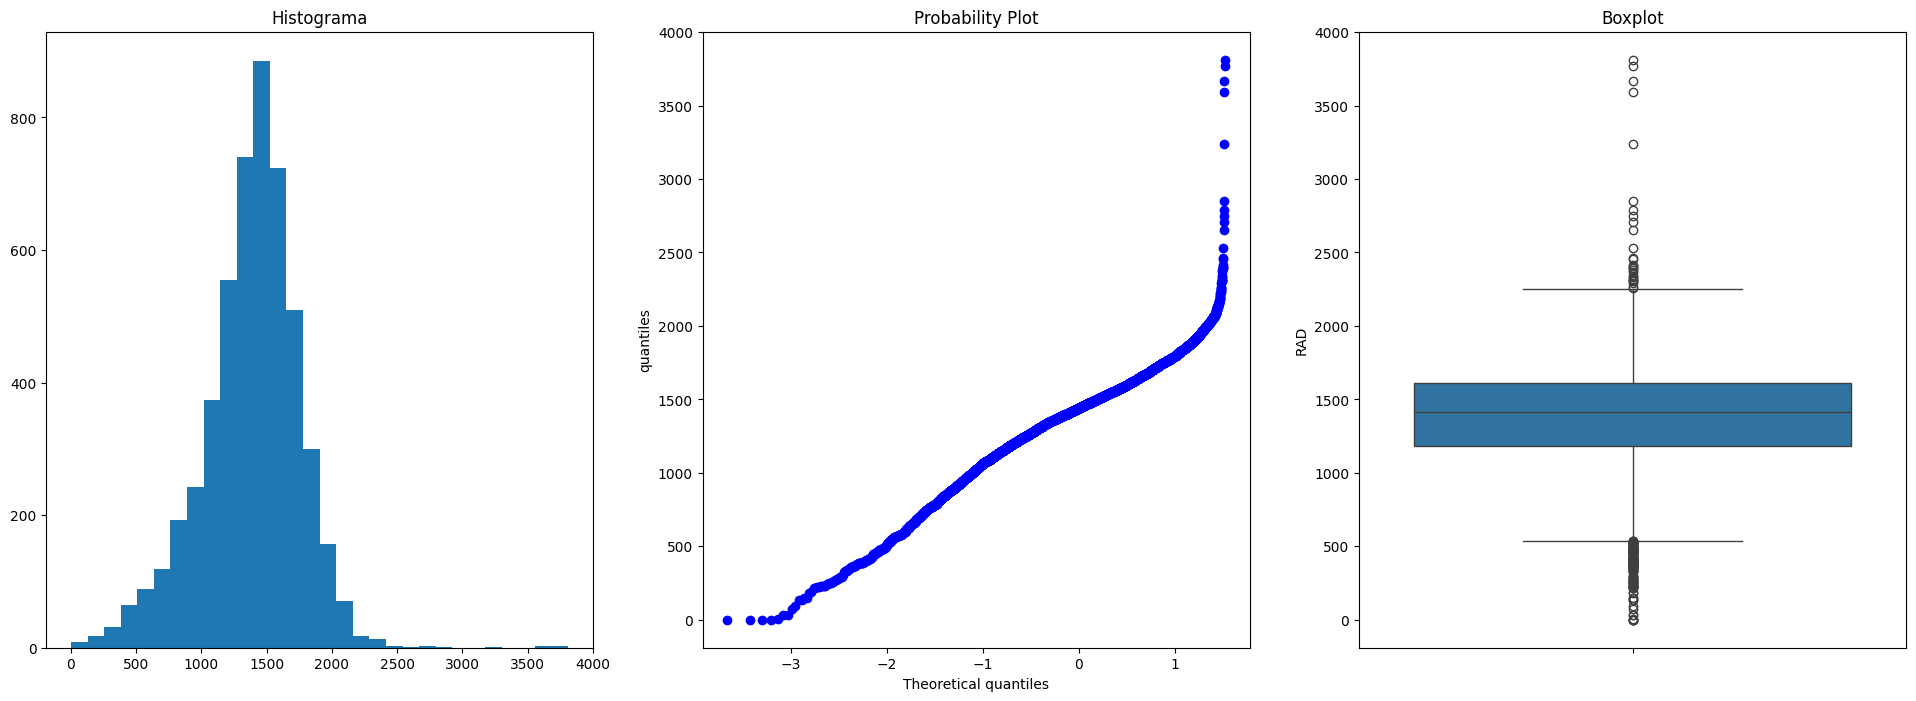

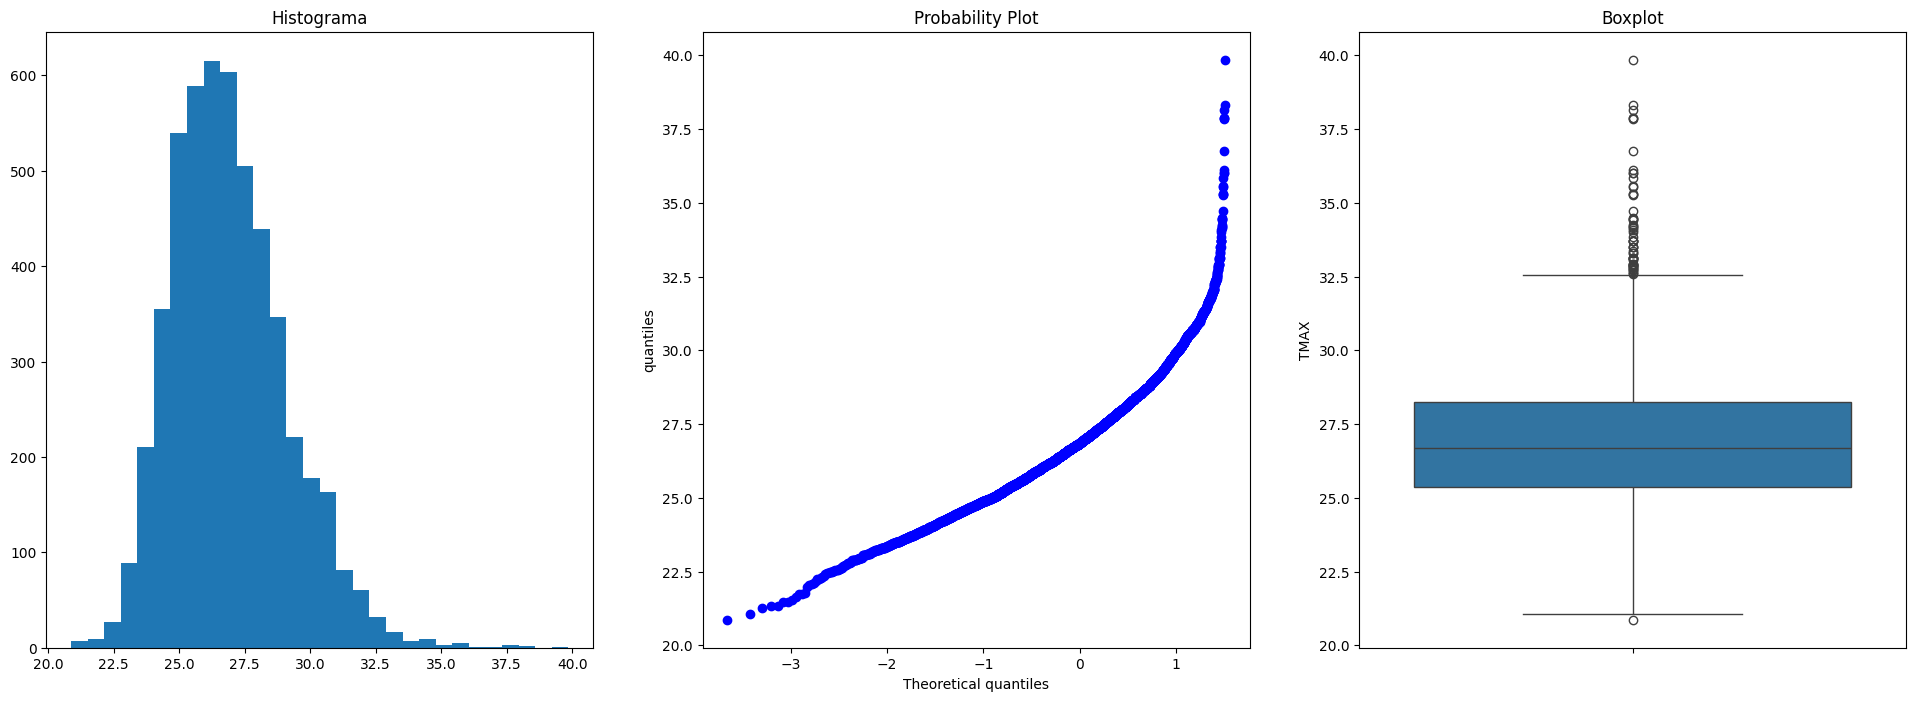

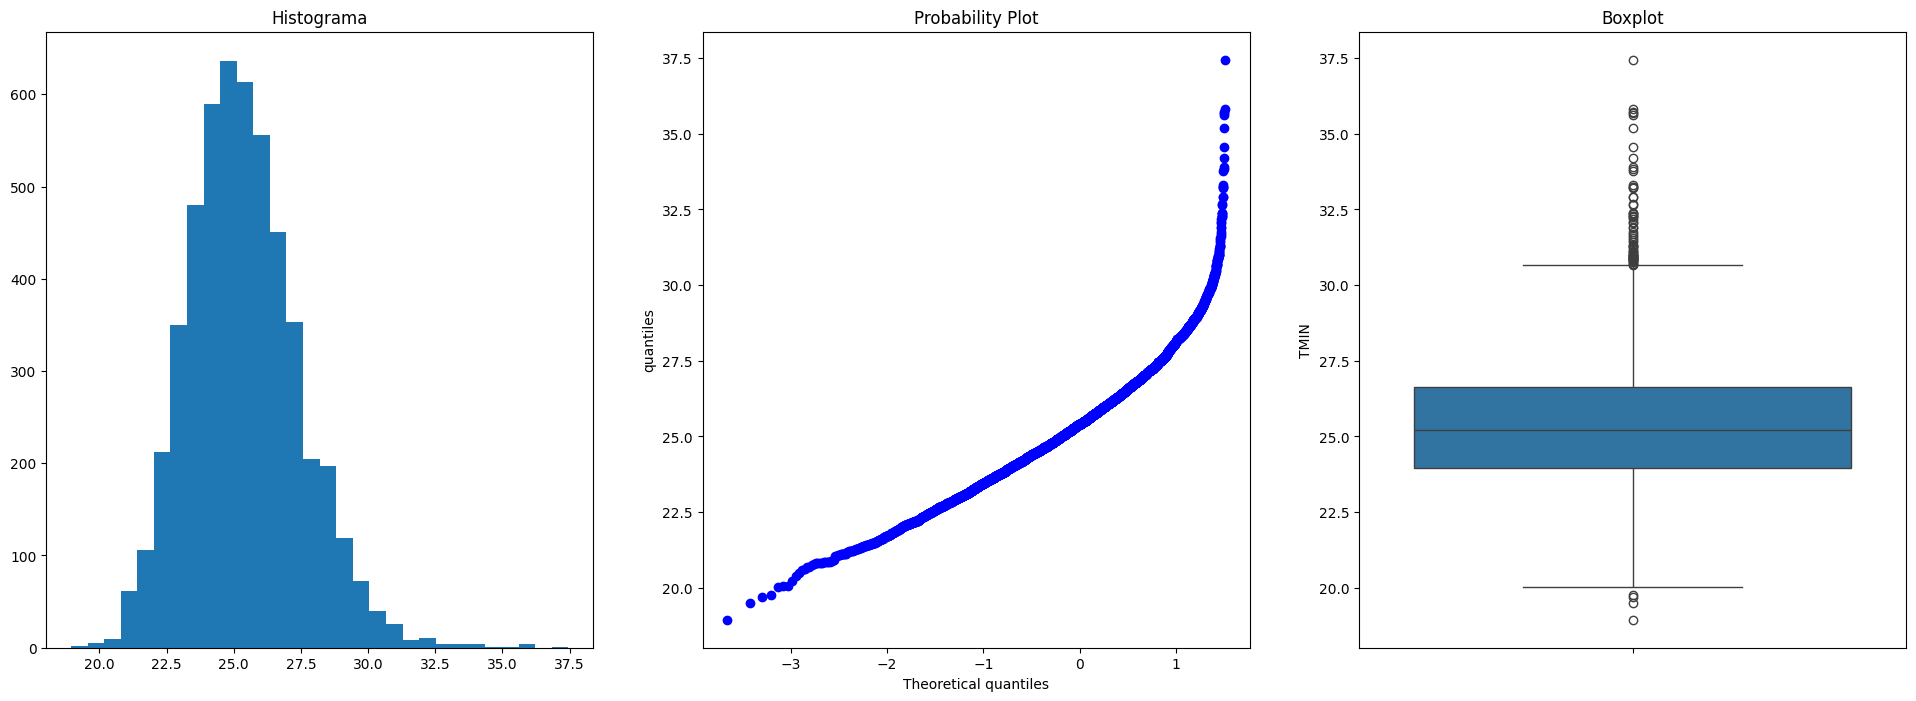

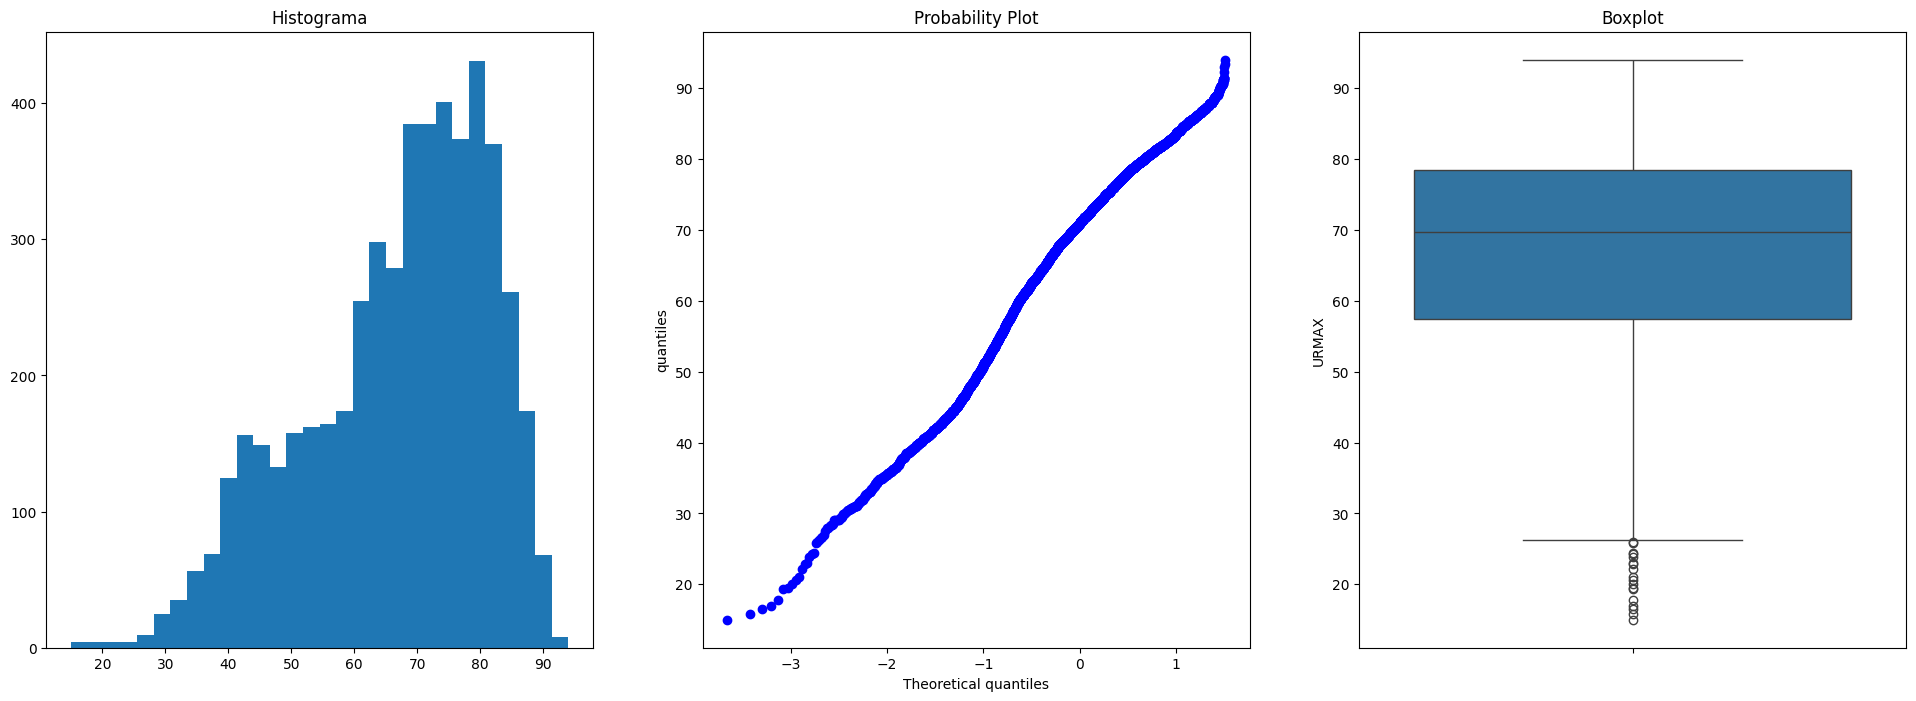

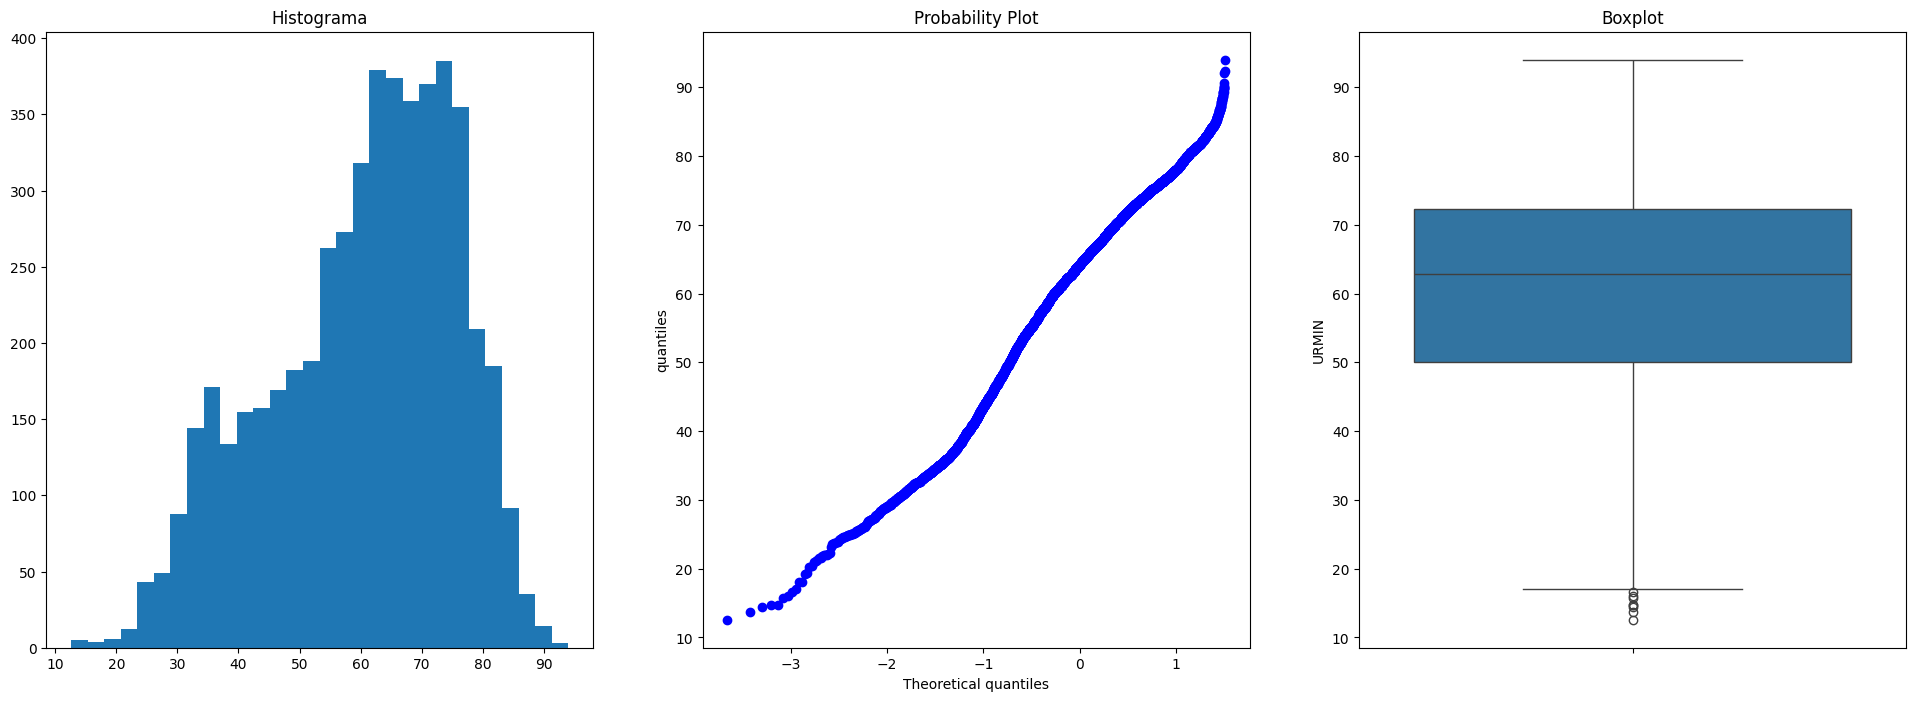

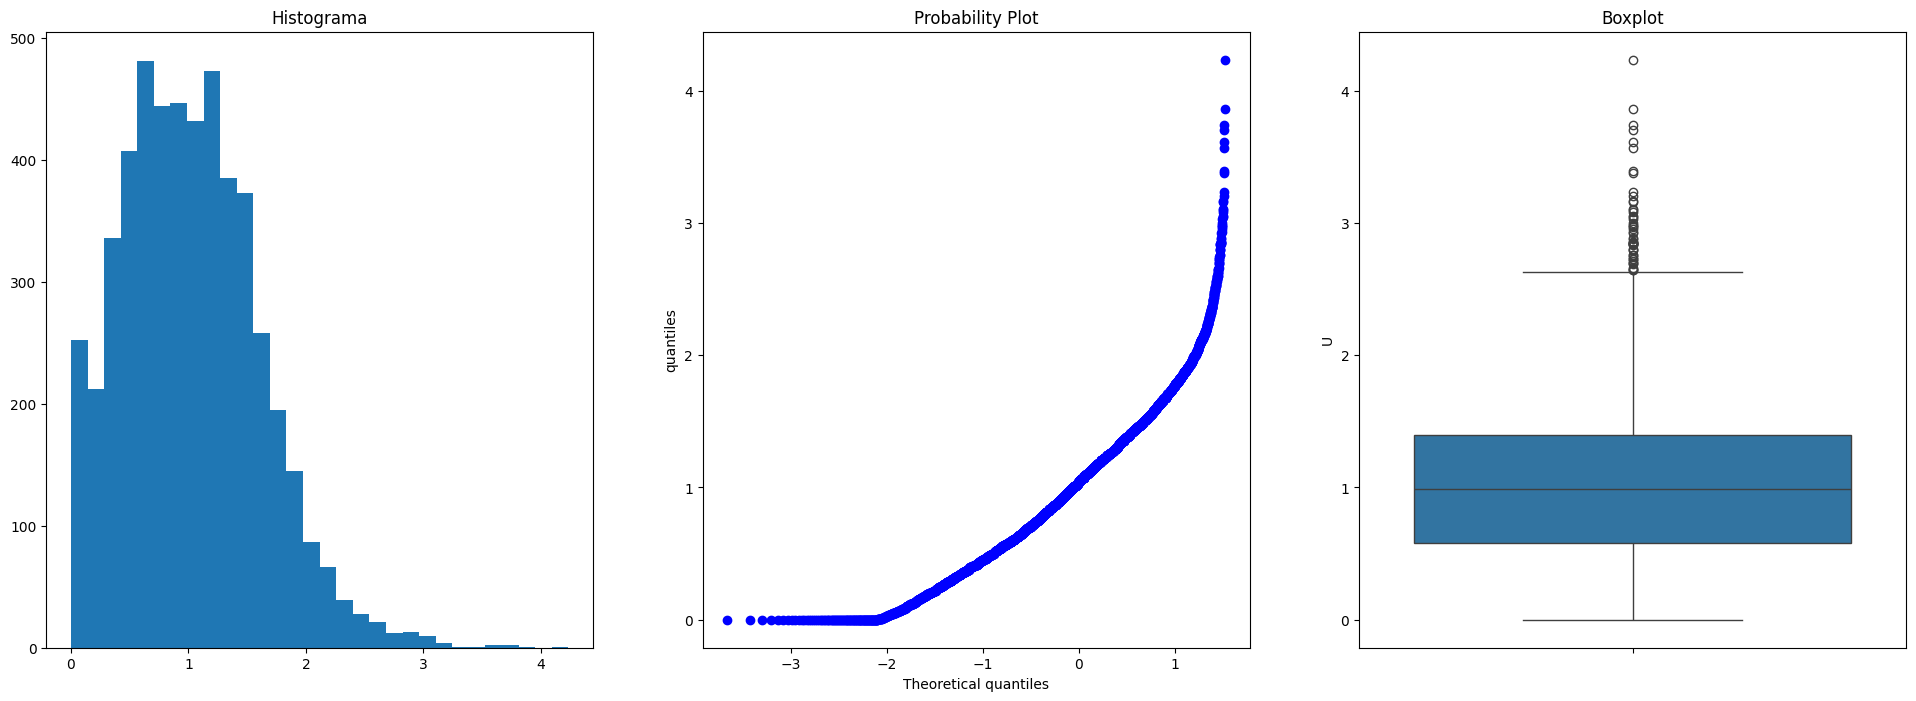

In [18]:
# Plotar os gráficos:

plot_graphic(new_df,'PREC')
plot_graphic(new_df,'RAD')
plot_graphic(new_df,'TMAX')
plot_graphic(new_df,'TMIN')
plot_graphic(new_df,'URMAX')
plot_graphic(new_df,'URMIN')
plot_graphic(new_df,'U')

In [19]:
IQR_find_extreme_values(new_df,'PREC', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
PREC
3º quartil: 0.2
1º quartil: 0.0
LS de PREC : 0.5
LI de PREC : -0.30000000000000004
Qtd acima de LS: 1050
Qtd abaixo de LI: 0
LS(%): 0.44157908681444846
LI(%): 0.0
-----------------------------------------


In [20]:
IQR_find_extreme_values(new_df,'RAD', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
RAD
3º quartil: 1610.7685328296704
1º quartil: 1181.5329302678572
LS de RAD : 2254.6219366723903
LI de RAD : 537.6795264251373
Qtd acima de LS: 28
Qtd abaixo de LI: 137
LS(%): 0.011775442315051959
LI(%): 0.05761555704150423
-----------------------------------------


In [21]:
IQR_find_extreme_values(new_df,'TMAX', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
TMAX
3º quartil: 28.237499999999997
1º quartil: 25.354166666666668
LS de TMAX : 32.56249999999999
LI de TMAX : 21.029166666666676
Qtd acima de LS: 59
Qtd abaixo de LI: 1
LS(%): 0.024812539163859487
LI(%): 0.0004205515112518557
-----------------------------------------


In [22]:
IQR_find_extreme_values(new_df,'TMIN', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
TMIN
3º quartil: 26.6375
1º quartil: 23.95593297101449
LS de TMIN : 30.659850543478264
LI de TMIN : 19.93358242753623
Qtd acima de LS: 64
Qtd abaixo de LI: 4
LS(%): 0.026915296720118765
LI(%): 0.0016822060450074228
-----------------------------------------


In [23]:
IQR_find_extreme_values(new_df,'URMAX', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
URMAX
3º quartil: 78.41098484848484
1º quartil: 57.47327898550725
LS de URMAX : 109.81754364295124
LI de URMAX : 26.066720191040858
Qtd acima de LS: 0
Qtd abaixo de LI: 18
LS(%): 0.0
LI(%): 0.007569927202533402
-----------------------------------------


In [24]:
IQR_find_extreme_values(new_df,'URMIN', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
URMIN
3º quartil: 72.26086956521739
1º quartil: 50.0
LS de URMIN : 105.65217391304347
LI de URMIN : 16.608695652173914
Qtd acima de LS: 0
Qtd abaixo de LI: 8
LS(%): 0.0
LI(%): 0.0033644120900148456
-----------------------------------------


In [25]:
IQR_find_extreme_values(new_df,'U', 1.5)

MÉTODO DO INTERVALO INTERQUARTIL OU IQR
-----------------------------------------
U
3º quartil: 1.4000000000000001
1º quartil: 0.5833333333333334
LS de U : 2.625
LI de U : -0.6416666666666667
Qtd acima de LS: 51
Qtd abaixo de LI: 0
LS(%): 0.02144812707384464
LI(%): 0.0
-----------------------------------------


# 5. Local Outlier Factor(LOF)

In [26]:
# Comparação entre IQR e LOF:

from sklearn.neighbors import LocalOutlierFactor

def outliers_find(df,x):
    q1  =  df[x].quantile(.25)
    q3  =  df[x].quantile(.75)
    iqr = q3-q1
    df['IQR']  = np.where(df[[x]]<(q1-1.5*iqr),-1, np.where(df[[x]]>(q3+1.5*iqr),-1,1))
    df['LOF'] = LocalOutlierFactor(n_neighbors=20, novelty=True).fit(df[[x]]).predict(df[[x]])   
    return df

outliers_find(new_df,'PREC')

,Data,PREC,RAD,TMAX,TMIN,URMAX,URMIN,U,IQR,LOF
0,2008-01-01,0.00,1510.37,27.77,26.65,75.92,70.04,1.62,1,1
1,2008-01-02,0.20,1205.72,27.12,26.02,73.17,66.87,2.16,1,1
2,2008-01-03,0.00,770.20,26.00,24.88,81.58,75.54,1.10,1,1
3,2008-01-04,0.40,1914.13,28.48,27.08,71.30,63.87,1.40,1,1
4,2008-01-05,0.00,1978.96,29.04,27.33,62.58,53.58,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...
5474,2022-12-27,0.00,1204.88,25.60,24.43,78.79,73.04,0.21,1,1
5475,2022-12-28,0.00,987.38,24.99,24.02,82.91,78.55,0.81,1,1
5476,2022-12-29,0.00,1284.71,25.53,24.24,79.91,73.82,0.26,1,1
5477,2022-12-30,0.00,1113.83,25.57,24.20,79.61,74.30,0.44,1,1


---
## Autoras:

* Profª. Drª. Patricia Angélica Alves Marques | **e-mail**: paamarques@usp.br 

* Doutoranda: Ângela Silviane Moura Cunha | **e-mail**: angelasilviane@usp.br